In [176]:
%pip install -qU pandas matplotlib seaborn requests

Note: you may need to restart the kernel to use updated packages.


In [175]:
import pandas as pd 

lb_movies = pd.read_csv('data/lb-movies.csv')

lb_movies 

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
...,...,...,...,...,...,...,...
941592,1941593,神笛,NaN,NaN,NaN,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,NaN,"The city that never sleeps, where insects gath...",30.0,NaN
941595,1941596,重生,NaN,NaN,"In a world where order has broken down, darkne...",NaN,NaN


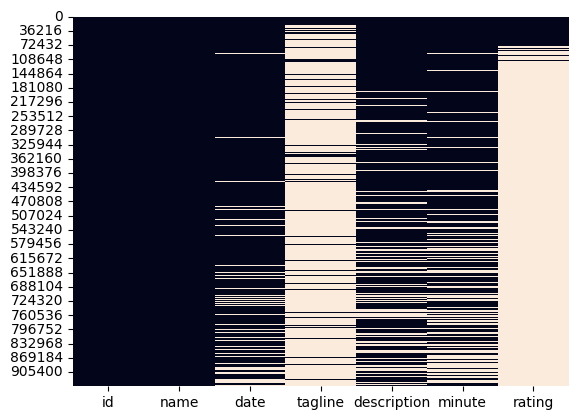

In [177]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Visualize null columns in movies
sns.heatmap(lb_movies.isnull(), cbar=False)
plt.show()

In [178]:
# Count missing columns
lb_movies.isna().sum()

id                  0
name               10
date            91913
tagline        802210
description    160812
minute         181570
rating         850598
dtype: int64

In [179]:
# Drop columns without rating or date (want to see how ratings may change over time)
movies = lb_movies.dropna(subset=['rating','date','minute','description'])

# Drop tagline column
movies = movies.drop(columns=['tagline'])

movies.isna().sum()

id             0
name           0
date           0
description    0
minute         0
rating         0
dtype: int64

In [192]:
# Retrieve movies from OMDb API with matching titles
import requests
import time 

API_KEY = "3ee55651" # f053828 3ee55651 138c195b
OMDB_URL = "http://www.omdbapi.com/"

def use_omdb_api(title, year):
    params = {
        't': title,
        'y': year,
        'apikey': API_KEY
    }
    response = requests.get(url=OMDB_URL, params=params)
    data = response.json()
    return data

In [ ]:
# Use pickle to save and store list, since OMDb API only allows 1000 per day
import pickle
with open('data/omdb-results.pkl', 'rb') as f:
    omdb_results = pickle.load(f)

In [193]:
start = 1000

for index, row in movies.iloc[start:].iterrows(): # API Key only allows 1000 per day, start at last index
    title = row['name']
    year_float = row['date']
    year = int(year_float)
    print(f'Get {title} from {year}')
    
    data = use_omdb_api(title=title, year=year)

    if data == {'Response': 'False', 'Error': 'Request limit reached!'}:
        print(f'Request limit reached')
        break

    omdb_results.append(data)

    time.sleep(0.2)

Get A Simple Favor from 2018
Get Evil Dead from 2013
Get The Falcon and the Winter Soldier from 2021
Get See How They Run from 2022
Get Spree from 2020
Get The Ring from 2002
Get Silence from 2016
Get Inherent Vice from 2014
Get Brazil from 1985
Get Cloverfield from 2008
Get Space Jam from 1996
Get Insomnia from 2002
Get Gran Torino from 2008
Get Wonder from 2017
Get Poltergeist from 1982
Get How to Train Your Dragon: The Hidden World from 2019
Get Rope from 1948
Get Minions from 2015
Get Hell or High Water from 2016
Get Jumanji: The Next Level from 2019
Get Sin City from 2005
Get Buffalo '66 from 1998
Get They Live from 1988
Get Irreversible from 2002
Get True Grit from 2010
Get Fear Street: 1666 from 2021
Get The Bourne Identity from 2002
Get Friends with Benefits from 2011
Get Where the Crawdads Sing from 2022
Get Hustlers from 2019
Get Mission: Impossible III from 2006
Get Me and Earl and the Dying Girl from 2015
Get Audition from 1999
Get Rashomon from 1950
Get The Deer Hunter fro

In [187]:
len(omdb_results)

1000

In [188]:
# Save results
with open('data/omdb-results.pkl', 'wb') as f:
    pickle.dump(omdb_results, f)

In [189]:
# Make a copy
movies_copy = movies.copy()
movies_copy

,id,name,date,description,minute,rating
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
...,...,...,...,...,...,...
164282,1164283,Naughty Grandma 2,2019.0,A man impersonates a nanny to infiltrate a mil...,86.0,2.66
164848,1164849,To Steal a Thief,1996.0,Roger is a failed petty criminal living in Sto...,93.0,2.95
165146,1165147,9 millimeter,1997.0,"The suburb that is a society within a society,...",96.0,2.77
165759,1165760,Dreamy,2013.0,An old rich man dreams of his deceased mother....,90.0,2.28


In [168]:
omdb_movies = pd.DataFrame(omdb_results)
movies1 = pd.concat([movies, omdb_movies], axis=1)
movies1

,id,name,date,description,minute,rating,Title,Year,Rated,Released,...,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons
0,1000001.0,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,Barbie,2023,PG-13,21 Jul 2023,...,"611,746",tt1517268,movie,N/A,"$636,238,421",N/A,N/A,True,NaN,NaN
1,1000002.0,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,Parasite,2019,R,08 Nov 2019,...,"1,058,893",tt6751668,movie,N/A,"$53,847,897",N/A,N/A,True,NaN,NaN
2,1000003.0,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,Everything Everywhere All at Once,2022,R,08 Apr 2022,...,"583,556",tt6710474,movie,N/A,"$77,191,785",N/A,N/A,True,NaN,NaN
3,1000004.0,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,Fight Club,1999,R,15 Oct 1999,...,"2,478,774",tt0137523,movie,N/A,"$37,030,102",N/A,N/A,True,NaN,NaN
4,1000005.0,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,La La Land,2016,PG-13,25 Dec 2016,...,"717,993",tt3783958,movie,N/A,"$151,101,803",N/A,N/A,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165146,1165147.0,9 millimeter,1997.0,"The suburb that is a society within a society,...",96.0,2.77,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165759,1165760.0,Dreamy,2013.0,An old rich man dreams of his deceased mother....,90.0,2.28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166579,1166580.0,Thinkal Muthal Velli Vare,2015.0,Jayadevan is a most-wanted writer in the Malay...,138.0,2.48,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2532,NaN,NaN,NaN,NaN,NaN,NaN,Someone Great,2019,R,19 Apr 2019,...,"26,097",tt8075260,movie,N/A,N/A,N/A,N/A,True,NaN,NaN


In [174]:
movies1.iloc[1999]

id                                                      1002000.0
name                                                Force Majeure
date                                                       2014.0
description     While holidaying in the French Alps, a Swedish...
minute                                                      120.0
rating                                                       3.88
Title                                               Force Majeure
Year                                                         2014
Rated                                                           R
Released                                              30 Dec 2014
Runtime                                                   120 min
Genre                                               Comedy, Drama
Director                                            Ruben Östlund
Writer                                              Ruben Östlund
Actors          Johannes Kuhnke, Lisa Loven Kongsli, Clara Wet...
Plot      

In [138]:
# Get Rotten Tomatoes score
def get_rt_score(ratings_list):
    if isinstance(ratings_list, list):
        for rating in ratings_list:
            if rating.get('Source') == 'Rotten Tomatoes':
                return rating.get('Value')
    return None

movies1['RottenTomatoes'] = None
movies1['RottenTomatoes'] = movies1['Ratings'].apply(get_rt_score)
movies1

,id,name,date,description,minute,rating,Title,Year,Rated,Released,...,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons,RottenTomatoes
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,Barbie,2023,PG-13,21 Jul 2023,...,tt1517268,movie,N/A,"$636,238,421",N/A,N/A,True,NaN,NaN,88%
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,Parasite,2019,R,08 Nov 2019,...,tt6751668,movie,N/A,"$53,847,897",N/A,N/A,True,NaN,NaN,99%
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,Everything Everywhere All at Once,2022,R,08 Apr 2022,...,tt6710474,movie,N/A,"$77,191,785",N/A,N/A,True,NaN,NaN,94%
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,Fight Club,1999,R,15 Oct 1999,...,tt0137523,movie,N/A,"$37,030,102",N/A,N/A,True,NaN,NaN,81%
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,La La Land,2016,PG-13,25 Dec 2016,...,tt3783958,movie,N/A,"$151,101,803",N/A,N/A,True,NaN,NaN,91%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164282,1164283,Naughty Grandma 2,2019.0,A man impersonates a nanny to infiltrate a mil...,86.0,2.66,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
164848,1164849,To Steal a Thief,1996.0,Roger is a failed petty criminal living in Sto...,93.0,2.95,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
165146,1165147,9 millimeter,1997.0,"The suburb that is a society within a society,...",96.0,2.77,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
165759,1165760,Dreamy,2013.0,An old rich man dreams of his deceased mother....,90.0,2.28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [139]:
# Keep only rows where Type is movie
movies1 = movies1[movies1['Type'] == 'movie']

In [140]:
# Keep only rows where there is a Rotten Tomatoes score
movies1 = movies1.dropna(subset=['Title','Year','RottenTomatoes'])
movies1

,id,name,date,description,minute,rating,Title,Year,Rated,Released,...,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons,RottenTomatoes
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,Barbie,2023,PG-13,21 Jul 2023,...,tt1517268,movie,N/A,"$636,238,421",N/A,N/A,True,NaN,NaN,88%
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,Parasite,2019,R,08 Nov 2019,...,tt6751668,movie,N/A,"$53,847,897",N/A,N/A,True,NaN,NaN,99%
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,Everything Everywhere All at Once,2022,R,08 Apr 2022,...,tt6710474,movie,N/A,"$77,191,785",N/A,N/A,True,NaN,NaN,94%
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,Fight Club,1999,R,15 Oct 1999,...,tt0137523,movie,N/A,"$37,030,102",N/A,N/A,True,NaN,NaN,81%
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,La La Land,2016,PG-13,25 Dec 2016,...,tt3783958,movie,N/A,"$151,101,803",N/A,N/A,True,NaN,NaN,91%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1001996,The Wedding Singer,1998.0,"Robbie, a local rock star turned wedding singe...",97.0,3.37,The Wedding Singer,1998,PG-13,13 Feb 1998,...,tt0120888,movie,N/A,"$80,245,725",N/A,N/A,True,NaN,NaN,72%
1996,1001997,"South Park: Bigger, Longer & Uncut",1999.0,When the four boys see an R-rated movie featur...,81.0,3.82,"South Park: Bigger, Longer & Uncut",1999,R,30 Jun 1999,...,tt0158983,movie,N/A,"$52,037,603",N/A,N/A,True,NaN,NaN,81%
1997,1001998,Reality,2023.0,"On June 3, 2017, 25-year-old Reality Winner re...",83.0,3.27,Reality,2023,TV-MA,29 May 2023,...,tt24068064,movie,N/A,N/A,N/A,N/A,True,NaN,NaN,94%
1998,1001999,Dr. No,1962.0,"In the film that launched the James Bond saga,...",110.0,3.43,Dr. No,1962,PG,10 Oct 1962,...,tt0055928,movie,N/A,"$16,067,035",N/A,N/A,True,NaN,NaN,95%


In [141]:
# Split Genre column by comma
genre_list = movies1['Genre'].str.split(',', expand=True)

genre_list.columns = [f'Genre_{i+1}' for i in range(genre_list.shape[1])]

movies1 = pd.concat([movies1, genre_list], axis=1)
movies1 = movies1.drop(columns=['Genre'])

In [142]:
# Drop unnecessary columns
movies1 = movies1.drop(columns=['Writer', 'Actors', 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'Production', 'Website', 'Response', 'Error', 'totalSeasons'])
movies1

,id,name,date,description,minute,rating,Title,Year,Rated,Released,Runtime,Director,Plot,Poster,BoxOffice,RottenTomatoes,Genre_1,Genre_2,Genre_3
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,Barbie,2023,PG-13,21 Jul 2023,114 min,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,"$636,238,421",88%,Adventure,Comedy,Fantasy
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,Parasite,2019,R,08 Nov 2019,132 min,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,"$53,847,897",99%,Drama,Thriller,None
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,Everything Everywhere All at Once,2022,R,08 Apr 2022,139 min,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,"$77,191,785",94%,Action,Adventure,Comedy
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,Fight Club,1999,R,15 Oct 1999,139 min,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,"$37,030,102",81%,Crime,Drama,Thriller
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,La La Land,2016,PG-13,25 Dec 2016,128 min,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,"$151,101,803",91%,Comedy,Drama,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1001996,The Wedding Singer,1998.0,"Robbie, a local rock star turned wedding singe...",97.0,3.37,The Wedding Singer,1998,PG-13,13 Feb 1998,97 min,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,"$80,245,725",72%,Comedy,Music,Romance
1996,1001997,"South Park: Bigger, Longer & Uncut",1999.0,When the four boys see an R-rated movie featur...,81.0,3.82,"South Park: Bigger, Longer & Uncut",1999,R,30 Jun 1999,81 min,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,"$52,037,603",81%,Animation,Comedy,Fantasy
1997,1001998,Reality,2023.0,"On June 3, 2017, 25-year-old Reality Winner re...",83.0,3.27,Reality,2023,TV-MA,29 May 2023,83 min,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,N/A,94%,Drama,None,None
1998,1001999,Dr. No,1962.0,"In the film that launched the James Bond saga,...",110.0,3.43,Dr. No,1962,PG,10 Oct 1962,110 min,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,"$16,067,035",95%,Action,Adventure,Thriller


In [143]:
# Convert Letterboxd to Rotten Tomatoes scale
movies1['LetterboxdConverted'] = None
movies1['LetterboxdConverted'] = ((movies1['rating'] / 5.0) * 100).round(0)
movies1

,id,name,date,description,minute,rating,Title,Year,Rated,Released,Runtime,Director,Plot,Poster,BoxOffice,RottenTomatoes,Genre_1,Genre_2,Genre_3,LetterboxdConverted
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,Barbie,2023,PG-13,21 Jul 2023,114 min,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,"$636,238,421",88%,Adventure,Comedy,Fantasy,77.0
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,Parasite,2019,R,08 Nov 2019,132 min,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,"$53,847,897",99%,Drama,Thriller,None,91.0
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,Everything Everywhere All at Once,2022,R,08 Apr 2022,139 min,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,"$77,191,785",94%,Action,Adventure,Comedy,86.0
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,Fight Club,1999,R,15 Oct 1999,139 min,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,"$37,030,102",81%,Crime,Drama,Thriller,85.0
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,La La Land,2016,PG-13,25 Dec 2016,128 min,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,"$151,101,803",91%,Comedy,Drama,Music,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1001996,The Wedding Singer,1998.0,"Robbie, a local rock star turned wedding singe...",97.0,3.37,The Wedding Singer,1998,PG-13,13 Feb 1998,97 min,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,"$80,245,725",72%,Comedy,Music,Romance,67.0
1996,1001997,"South Park: Bigger, Longer & Uncut",1999.0,When the four boys see an R-rated movie featur...,81.0,3.82,"South Park: Bigger, Longer & Uncut",1999,R,30 Jun 1999,81 min,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,"$52,037,603",81%,Animation,Comedy,Fantasy,76.0
1997,1001998,Reality,2023.0,"On June 3, 2017, 25-year-old Reality Winner re...",83.0,3.27,Reality,2023,TV-MA,29 May 2023,83 min,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,N/A,94%,Drama,None,None,65.0
1998,1001999,Dr. No,1962.0,"In the film that launched the James Bond saga,...",110.0,3.43,Dr. No,1962,PG,10 Oct 1962,110 min,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,"$16,067,035",95%,Action,Adventure,Thriller,69.0


In [144]:
movies1_copy = movies1.copy()
movies1_copy

,id,name,date,description,minute,rating,Title,Year,Rated,Released,Runtime,Director,Plot,Poster,BoxOffice,RottenTomatoes,Genre_1,Genre_2,Genre_3,LetterboxdConverted
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,Barbie,2023,PG-13,21 Jul 2023,114 min,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,"$636,238,421",88%,Adventure,Comedy,Fantasy,77.0
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,Parasite,2019,R,08 Nov 2019,132 min,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,"$53,847,897",99%,Drama,Thriller,None,91.0
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,Everything Everywhere All at Once,2022,R,08 Apr 2022,139 min,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,"$77,191,785",94%,Action,Adventure,Comedy,86.0
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,Fight Club,1999,R,15 Oct 1999,139 min,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,"$37,030,102",81%,Crime,Drama,Thriller,85.0
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,La La Land,2016,PG-13,25 Dec 2016,128 min,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,"$151,101,803",91%,Comedy,Drama,Music,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1001996,The Wedding Singer,1998.0,"Robbie, a local rock star turned wedding singe...",97.0,3.37,The Wedding Singer,1998,PG-13,13 Feb 1998,97 min,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,"$80,245,725",72%,Comedy,Music,Romance,67.0
1996,1001997,"South Park: Bigger, Longer & Uncut",1999.0,When the four boys see an R-rated movie featur...,81.0,3.82,"South Park: Bigger, Longer & Uncut",1999,R,30 Jun 1999,81 min,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,"$52,037,603",81%,Animation,Comedy,Fantasy,76.0
1997,1001998,Reality,2023.0,"On June 3, 2017, 25-year-old Reality Winner re...",83.0,3.27,Reality,2023,TV-MA,29 May 2023,83 min,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,N/A,94%,Drama,None,None,65.0
1998,1001999,Dr. No,1962.0,"In the film that launched the James Bond saga,...",110.0,3.43,Dr. No,1962,PG,10 Oct 1962,110 min,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,"$16,067,035",95%,Action,Adventure,Thriller,69.0


In [145]:
import numpy as np 

# Convert types to numeric/string
movies1['Runtime1'] = None
movies1['Runtime1'] = movies1['Runtime'].str.replace(' min', '').astype(np.float64)

movies1['RottenTomatoes'] = movies1['RottenTomatoes'].astype(str).str.replace('%', '').astype(np.float64)

movies1['Year'] = movies1['Year'].astype(np.float64)

movies1['BoxOffice'] = movies1['BoxOffice'].astype(str).str.replace('[$,]', '', regex=True)

movies1

,id,name,date,description,minute,rating,Title,Year,Rated,Released,...,Director,Plot,Poster,BoxOffice,RottenTomatoes,Genre_1,Genre_2,Genre_3,LetterboxdConverted,Runtime1
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,Barbie,2023.0,PG-13,21 Jul 2023,...,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,636238421,88.0,Adventure,Comedy,Fantasy,77.0,114.0
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,Parasite,2019.0,R,08 Nov 2019,...,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,53847897,99.0,Drama,Thriller,None,91.0,132.0
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,Everything Everywhere All at Once,2022.0,R,08 Apr 2022,...,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,77191785,94.0,Action,Adventure,Comedy,86.0,139.0
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,Fight Club,1999.0,R,15 Oct 1999,...,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,37030102,81.0,Crime,Drama,Thriller,85.0,139.0
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,La La Land,2016.0,PG-13,25 Dec 2016,...,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,151101803,91.0,Comedy,Drama,Music,82.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1001996,The Wedding Singer,1998.0,"Robbie, a local rock star turned wedding singe...",97.0,3.37,The Wedding Singer,1998.0,PG-13,13 Feb 1998,...,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,80245725,72.0,Comedy,Music,Romance,67.0,97.0
1996,1001997,"South Park: Bigger, Longer & Uncut",1999.0,When the four boys see an R-rated movie featur...,81.0,3.82,"South Park: Bigger, Longer & Uncut",1999.0,R,30 Jun 1999,...,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,52037603,81.0,Animation,Comedy,Fantasy,76.0,81.0
1997,1001998,Reality,2023.0,"On June 3, 2017, 25-year-old Reality Winner re...",83.0,3.27,Reality,2023.0,TV-MA,29 May 2023,...,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,N/A,94.0,Drama,None,None,65.0,83.0
1998,1001999,Dr. No,1962.0,"In the film that launched the James Bond saga,...",110.0,3.43,Dr. No,1962.0,PG,10 Oct 1962,...,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,16067035,95.0,Action,Adventure,Thriller,69.0,110.0


In [146]:
# Also check minutes 
filter_movies = movies1[movies1['date'] != movies1['Year']]

filter_movies

,id,name,date,description,minute,rating,Title,Year,Rated,Released,...,Director,Plot,Poster,BoxOffice,RottenTomatoes,Genre_1,Genre_2,Genre_3,LetterboxdConverted,Runtime1


In [147]:
movies_final = movies1.drop(columns=['id', 'name', 'date', 'description', 'minute', 'rating', 'Released', 'Runtime'])
movies_final = movies_final.rename(columns = {"Runtime1": "Runtime"})
movies_final

,Title,Year,Rated,Director,Plot,Poster,BoxOffice,RottenTomatoes,Genre_1,Genre_2,Genre_3,LetterboxdConverted,Runtime
0,Barbie,2023.0,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,636238421,88.0,Adventure,Comedy,Fantasy,77.0,114.0
1,Parasite,2019.0,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,53847897,99.0,Drama,Thriller,None,91.0,132.0
2,Everything Everywhere All at Once,2022.0,R,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,77191785,94.0,Action,Adventure,Comedy,86.0,139.0
3,Fight Club,1999.0,R,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,37030102,81.0,Crime,Drama,Thriller,85.0,139.0
4,La La Land,2016.0,PG-13,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,151101803,91.0,Comedy,Drama,Music,82.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,The Wedding Singer,1998.0,PG-13,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,80245725,72.0,Comedy,Music,Romance,67.0,97.0
1996,"South Park: Bigger, Longer & Uncut",1999.0,R,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,52037603,81.0,Animation,Comedy,Fantasy,76.0,81.0
1997,Reality,2023.0,TV-MA,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,N/A,94.0,Drama,None,None,65.0,83.0
1998,Dr. No,1962.0,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,16067035,95.0,Action,Adventure,Thriller,69.0,110.0


In [148]:
import sqlite3 as sql

conn = sql.connect('data/movies.db')

cn = conn.cursor()

movies_final.to_sql('original_table', conn, if_exists='replace', index=False)

1898

In [149]:
table = pd.read_sql_query("SELECT * FROM original_table", conn)
table

,Title,Year,Rated,Director,Plot,Poster,BoxOffice,RottenTomatoes,Genre_1,Genre_2,Genre_3,LetterboxdConverted,Runtime
0,Barbie,2023.0,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,636238421,88.0,Adventure,Comedy,Fantasy,77.0,114.0
1,Parasite,2019.0,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,53847897,99.0,Drama,Thriller,None,91.0,132.0
2,Everything Everywhere All at Once,2022.0,R,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,77191785,94.0,Action,Adventure,Comedy,86.0,139.0
3,Fight Club,1999.0,R,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,37030102,81.0,Crime,Drama,Thriller,85.0,139.0
4,La La Land,2016.0,PG-13,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,151101803,91.0,Comedy,Drama,Music,82.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,The Wedding Singer,1998.0,PG-13,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,80245725,72.0,Comedy,Music,Romance,67.0,97.0
1894,"South Park: Bigger, Longer & Uncut",1999.0,R,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,52037603,81.0,Animation,Comedy,Fantasy,76.0,81.0
1895,Reality,2023.0,TV-MA,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,N/A,94.0,Drama,None,None,65.0,83.0
1896,Dr. No,1962.0,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,16067035,95.0,Action,Adventure,Thriller,69.0,110.0


In [150]:
for row in cn.execute('SELECT name FROM sqlite_master;'):
    print(row)

('sqlite_sequence',)
('movies',)
('ratings',)
('genres',)
('sqlite_autoindex_genres_1',)
('movie_genre',)
('original_table',)


In [151]:
for row in cn.execute('PRAGMA table_info(original_table)'):
    print(row)

(0, 'Title', 'TEXT', 0, None, 0)
(1, 'Year', 'REAL', 0, None, 0)
(2, 'Rated', 'TEXT', 0, None, 0)
(3, 'Director', 'TEXT', 0, None, 0)
(4, 'Plot', 'TEXT', 0, None, 0)
(5, 'Poster', 'TEXT', 0, None, 0)
(6, 'BoxOffice', 'TEXT', 0, None, 0)
(7, 'RottenTomatoes', 'REAL', 0, None, 0)
(8, 'Genre_1', 'TEXT', 0, None, 0)
(9, 'Genre_2', 'TEXT', 0, None, 0)
(10, 'Genre_3', 'TEXT', 0, None, 0)
(11, 'LetterboxdConverted', 'REAL', 0, None, 0)
(12, 'Runtime', 'REAL', 0, None, 0)


In [152]:
create_movies = '''
    CREATE TABLE IF NOT EXISTS movies(
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT,
        year INT,
        rated TEXT,
        director TEXT,
        plot TEXT,
        poster TEXT,
        runtime FLOAT,
        box_office INTEGER
    )
'''

insert_movies = '''
    INSERT INTO movies(title, year, rated, director, plot, poster, runtime, box_office) 
    SELECT DISTINCT Title, CAST(Year AS INTEGER), Rated, Director, Plot, Poster, CAST(Runtime AS FLOAT), CAST(BoxOffice AS INTEGER)
    FROM original_table
'''

drop_movies = 'DROP TABLE IF EXISTS movies'
cn.execute(drop_movies)
cn.execute(create_movies)
cn.execute(insert_movies)

In [153]:
table = pd.read_sql_query("SELECT * FROM movies", conn)
table

,id,title,year,rated,director,plot,poster,runtime,box_office
0,1,Barbie,2023,PG-13,Greta Gerwig,Barbie and Ken are having the time of their li...,https://m.media-amazon.com/images/M/MV5BYjI3ND...,114.0,636238421
1,2,Parasite,2019,R,Bong Joon Ho,Greed and class discrimination threaten the ne...,https://m.media-amazon.com/images/M/MV5BYjk1Y2...,132.0,53847897
2,3,Everything Everywhere All at Once,2022,R,"Daniel Kwan, Daniel Scheinert",A middle-aged Chinese immigrant is swept up in...,https://m.media-amazon.com/images/M/MV5BOWNmMz...,139.0,77191785
3,4,Fight Club,1999,R,David Fincher,An insomniac office worker and a devil-may-car...,https://m.media-amazon.com/images/M/MV5BOTgyOG...,139.0,37030102
4,5,La La Land,2016,PG-13,Damien Chazelle,"When Sebastian, a pianist, and Mia, an actress...",https://m.media-amazon.com/images/M/MV5BMzUzND...,128.0,151101803
...,...,...,...,...,...,...,...,...,...
1893,1894,The Wedding Singer,1998,PG-13,Frank Coraci,"Robbie, a singer, and Julia, a waitress, are b...",https://m.media-amazon.com/images/M/MV5BNjU5MG...,97.0,80245725
1894,1895,"South Park: Bigger, Longer & Uncut",1999,R,Trey Parker,When Eric Cartman and his friends go see an R-...,https://m.media-amazon.com/images/M/MV5BMDcyND...,81.0,52037603
1895,1896,Reality,2023,TV-MA,Tina Satter,A former American intelligence specialist was ...,https://m.media-amazon.com/images/M/MV5BMTMyNz...,83.0,0
1896,1897,Dr. No,1962,PG,Terence Young,A resourceful British government agent seeks a...,https://m.media-amazon.com/images/M/MV5BM2Q0OD...,110.0,16067035


In [154]:
create_ratings = '''
    CREATE TABLE IF NOT EXISTS ratings (
        rating_id INTEGER PRIMARY KEY AUTOINCREMENT,
        movie_id INT,
        letterboxd_score FLOAT,
        rotten_tomatoes_score FLOAT,
        score_difference FLOAT,
        FOREIGN KEY(movie_id) REFERENCES movies(id)
    )
'''

insert_ratings = '''
    INSERT INTO ratings(movie_id, letterboxd_score, rotten_tomatoes_score, score_difference)
    SELECT m.id, CAST(o.LetterboxdConverted AS FLOAT), CAST(o.RottenTomatoes AS FLOAT), CAST(o.LetterboxdConverted AS FLOAT) - CAST(o.RottenTomatoes AS FLOAT)
    FROM original_table o
    JOIN movies m ON o.Title = m.title AND CAST(o.Year AS INT) = m.year
'''

drop_ratings = 'DROP TABLE IF EXISTS ratings'
cn.execute(drop_ratings)
cn.execute(create_ratings)
cn.execute(insert_ratings)

In [155]:
table = pd.read_sql_query("SELECT * FROM ratings", conn)
table

,rating_id,movie_id,letterboxd_score,rotten_tomatoes_score,score_difference
0,1,1,77.0,88.0,-11.0
1,2,2,91.0,99.0,-8.0
2,3,3,86.0,94.0,-8.0
3,4,4,85.0,81.0,4.0
4,5,5,82.0,91.0,-9.0
...,...,...,...,...,...
1893,1894,1894,67.0,72.0,-5.0
1894,1895,1895,76.0,81.0,-5.0
1895,1896,1896,65.0,94.0,-29.0
1896,1897,1897,69.0,95.0,-26.0


In [156]:
create_genres = '''
    CREATE TABLE IF NOT EXISTS genres (
        genre_id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT UNIQUE
    )
'''

# Ignore hidden spaces
insert_genres = '''
    INSERT OR IGNORE INTO genres(name)
    SELECT TRIM(Genre_1) AS g FROM original_table WHERE Genre_1 IS NOT NULL
    UNION
    SELECT TRIM(Genre_2) FROM original_table WHERE Genre_2 IS NOT NULL
    UNION
    SELECT TRIM(Genre_3) FROM original_table WHERE Genre_3 IS NOT NULL
'''

drop_genres = 'DROP TABLE IF EXISTS genres'
cn.execute(drop_genres)
cn.execute(create_genres)
cn.execute(insert_genres)

In [157]:
table = pd.read_sql_query("SELECT * FROM genres", conn)
table

,genre_id,name
0,1,Action
1,2,Adventure
2,3,Animation
3,4,Biography
4,5,Comedy
5,6,Crime
6,7,Documentary
7,8,Drama
8,9,Family
9,10,Fantasy


In [158]:
create_movie_genre = '''
    CREATE TABLE IF NOT EXISTS movie_genre (
        movie_id INTEGER,
        genre_id INTEGER,
        FOREIGN KEY(movie_id) REFERENCES movies(id),
        FOREIGN KEY(genre_id) REFERENCES genres(genre_id)
    )
'''

insert_movie_genre = '''
    INSERT INTO movie_genre(movie_id, genre_id)
    SELECT m.id, g.genre_id 
    FROM original_table o
    JOIN movies m ON LOWER(TRIM(m.title)) = LOWER(TRIM(o.Title)) AND m.year = CAST(o.Year AS INTEGER)
    JOIN genres g ON LOWER(TRIM(o.Genre_1)) = LOWER(g.name)
    WHERE o.Genre_1 IS NOT NULL

    UNION

    SELECT m.id, g.genre_id 
    FROM original_table o
    JOIN movies m ON LOWER(TRIM(m.title)) = LOWER(TRIM(o.Title)) AND m.year = CAST(o.Year AS INTEGER)
    JOIN genres g ON LOWER(TRIM(o.Genre_2)) = LOWER(g.name)
    WHERE o.Genre_2 IS NOT NULL

    UNION

    SELECT m.id, g.genre_id 
    FROM original_table o
    JOIN movies m ON LOWER(TRIM(m.title)) = LOWER(TRIM(o.Title)) AND m.year = CAST(o.Year AS INTEGER)
    JOIN genres g ON LOWER(TRIM(o.Genre_3)) = LOWER(g.name)
    WHERE o.Genre_3 IS NOT NULL;
'''

drop_moviegenre = 'DROP TABLE IF EXISTS movie_genre'
cn.execute(drop_moviegenre)
cn.execute(create_movie_genre)
cn.execute(insert_movie_genre)

In [159]:
table = pd.read_sql_query("SELECT * FROM movie_genre", conn)
table

,movie_id,genre_id
0,1,2
1,1,5
2,1,10
3,2,8
4,2,22
...,...,...
4972,1897,1
4973,1897,2
4974,1897,22
4975,1898,5


In [160]:
conn.commit()
cn.close()
conn.close()

In [161]:
# Back to pandas dataframe to analyze statistics

conn = sql.connect('data/movies.db')

cn = conn.cursor()

moviesSQL = pd.read_sql("SELECT * FROM movies", conn)
ratingsSQL = pd.read_sql("SELECT * FROM ratings", conn)
genresSQL = pd.read_sql("SELECT * FROM genres", conn)
movie_genreSQL = pd.read_sql("SELECT * FROM movie_genre", conn)

cn.close()
conn.close()